In [30]:
from bagpy import bagreader
bagpath = "../data/raw/Sample-Data/Sample-Data.bag"
b = bagreader(bagpath)
print(b.topic_table)

[INFO]  Data folder ../data/raw/Sample-Data/Sample-Data already exists. Not creating.
                Topics                         Types  Message Count  \
0                 /gps         sensor_msgs/NavSatFix           4896   
1            /gps_time     sensor_msgs/TimeReference           4896   
2    /image_front_left             sensor_msgs/Image            326   
3                 /imu               sensor_msgs/Imu           4896   
4     /lidar_blue_scan    velodyne_msgs/VelodyneScan            246   
5    /lidar_green_scan    velodyne_msgs/VelodyneScan            246   
6      /lidar_red_scan    velodyne_msgs/VelodyneScan            246   
7   /lidar_yellow_scan    velodyne_msgs/VelodyneScan            245   
8   /pose_ground_truth     geometry_msgs/PoseStamped           4858   
9      /pose_localized     geometry_msgs/PoseStamped            539   
10           /pose_raw     geometry_msgs/PoseStamped           4872   
11                 /tf            tf2_msgs/TFMessage          

Lets explore some of the data

In [31]:
import pandas as pd
for topic in b.topic_table['Topics']:
    csv = b.message_by_topic(topic)
    df = pd.read_csv(csv)
    print(f"Data from topic '{topic}':")
    print(df.head())

Data from topic '/gps':
           Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0  1.501822e+09           6         1501822123            31317949   
1  1.501822e+09          70         1501822123            39287090   
2  1.501822e+09          89         1501822123            41313886   
3  1.501822e+09         159         1501822123            49295902   
4  1.501822e+09         180         1501822123            51310062   

  header.frame_id  status.status  status.service   latitude  longitude  \
0             gps              0               0  42.305971 -83.244833   
1             gps              0               0  42.305971 -83.244833   
2             gps              0               0  42.305971 -83.244833   
3             gps              0               0  42.305971 -83.244833   
4             gps              0               0  42.305971 -83.244833   

     altitude  position_covariance_0  position_covariance_1  \
0  156.021419                    0.0           

Quick check for differences in pose tables

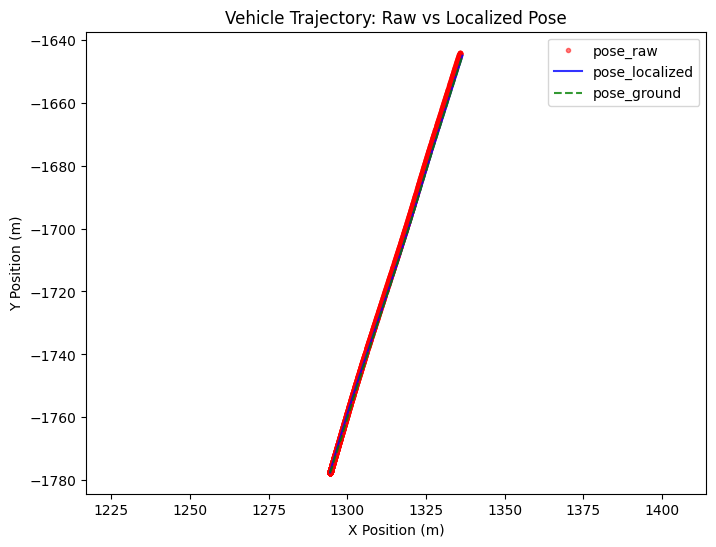

In [32]:
import matplotlib.pyplot as plt

# Read topics into DataFrames
pose_raw_csv = b.message_by_topic('/pose_raw')
pose_raw = pd.read_csv(pose_raw_csv)

pose_loc_csv = b.message_by_topic('/pose_localized')
pose_loc = pd.read_csv(pose_loc_csv)

pose_ground_csv = b.message_by_topic('/pose_ground_truth')
pose_ground = pd.read_csv(pose_ground_csv)

# Plot X vs Y for each
plt.figure(figsize=(8,6))
plt.plot(pose_raw['pose.position.x'], pose_raw['pose.position.y'], 'r.', alpha=0.5, label='pose_raw')
plt.plot(pose_loc['pose.position.x'], pose_loc['pose.position.y'], 'b-', alpha=0.8, label='pose_localized')
plt.plot(pose_ground['pose.position.x'], pose_ground['pose.position.y'], 'g--', alpha=0.8, label='pose_ground')

plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Vehicle Trajectory: Raw vs Localized Pose")
plt.legend()
plt.axis("equal")   # keep scale consistent
plt.show()


In [33]:
import numpy as np

# Align indices for pose_raw and pose_loc
common_indices = pose_loc.index

# Calculate variance for position (x, y, z) between pose_raw and pose_loc
var_x = np.var(pose_raw.loc[common_indices, 'pose.position.x'] - pose_loc['pose.position.x'])
var_y = np.var(pose_raw.loc[common_indices, 'pose.position.y'] - pose_loc['pose.position.y'])
var_z = np.var(pose_raw.loc[common_indices, 'pose.position.z'] - pose_loc['pose.position.z'])

print(f"Variance in X: {var_x}")
print(f"Variance in Y: {var_y}")
print(f"Variance in Z: {var_z}")

Variance in X: 164.4140197366276
Variance in Y: 1589.2341065536023
Variance in Z: 0.14617264367763752


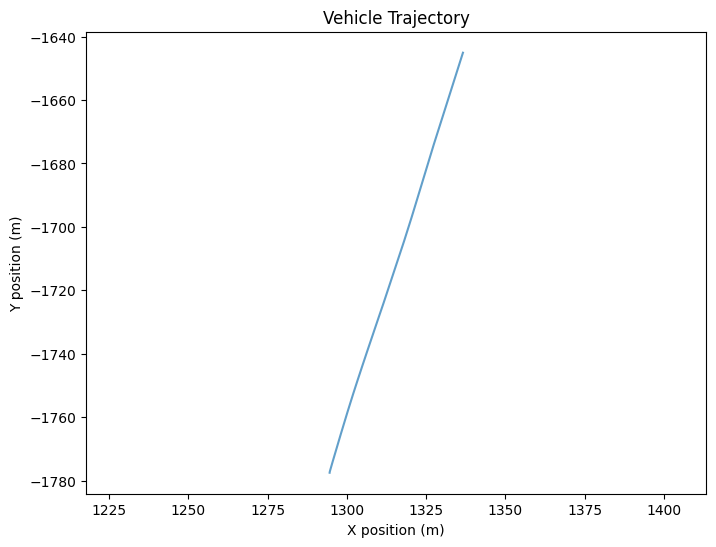

In [37]:
import matplotlib.pyplot as plt


pose_csv = b.message_by_topic('/pose_localized')  # or '/pose_raw', '/pose'
pose_df = pd.read_csv(pose_csv)


# Plot trajectory (X vs Y)
plt.figure(figsize=(8, 6))
plt.plot(pose_df['pose.position.x'], pose_df['pose.position.y'], alpha=0.7)
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.title("Vehicle Trajectory")
plt.axis("equal")  # Keep scale equal so trajectory isn’t distorted
plt.show()



Clean up and organize data into traditional relational db

In [ ]:
import sqlite3

# Create SQLite database and tables
conn = sqlite3.connect('sample_data.db')
cursor = conn.cursor()

# Create tables for velocity, gps, imu, and lidar_blue
cursor.execute('''
CREATE TABLE IF NOT EXISTS velocity_raw (
    Time REAL,
    header_seq INTEGER,
    header_stamp_secs INTEGER,
    header_stamp_nsecs INTEGER,
    header_frame_id TEXT,
    vector_x REAL,
    vector_y REAL,
    vector_z REAL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS gps (
    Time REAL,
    header_seq INTEGER,
    header_stamp_secs INTEGER,
    header_stamp_nsecs INTEGER,
    header_frame_id TEXT,
    status_status INTEGER,
    status_service INTEGER,
    latitude REAL,
    longitude REAL,
    altitude REAL,
    position_covariance_0 REAL,
    position_covariance_1 REAL,
    position_covariance_2 REAL,
    position_covariance_3 REAL,
    position_covariance_4 REAL,
    position_covariance_5 REAL,
    position_covariance_6 REAL,
    position_covariance_7 REAL,
    position_covariance_8 REAL,
    position_covariance_type INTEGER
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS imu (
    Time REAL,
    header_seq INTEGER,
    header_stamp_secs INTEGER,
    header_stamp_nsecs INTEGER,
    header_frame_id TEXT,
    orientation_x REAL,
    orientation_y REAL,
    orientation_z REAL,
    orientation_w REAL,
    orientation_covariance_0 REAL,
    orientation_covariance_1 REAL,
    orientation_covariance_2 REAL,
    orientation_covariance_3 REAL,
    orientation_covariance_4 REAL,
    orientation_covariance_5 REAL,
    orientation_covariance_6 REAL,
    orientation_covariance_7 REAL,
    orientation_covariance_8 REAL,
    angular_velocity_x REAL,
    angular_velocity_y REAL,
    angular_velocity_z REAL,
    angular_velocity_covariance_0 REAL,
    angular_velocity_covariance_1 REAL,
    angular_velocity_covariance_2 REAL,
    angular_velocity_covariance_3 REAL,
    angular_velocity_covariance_4 REAL,
    angular_velocity_covariance_5 REAL,
    angular_velocity_covariance_6 REAL,
    angular_velocity_covariance_7 REAL,
    angular_velocity_covariance_8 REAL,
    linear_acceleration_x REAL,
    linear_acceleration_y REAL,
    linear_acceleration_z REAL,
    linear_acceleration_covariance_0 REAL,
    linear_acceleration_covariance_1 REAL,
    linear_acceleration_covariance_2 REAL,
    linear_acceleration_covariance_3 REAL,
    linear_acceleration_covariance_4 REAL,
    linear_acceleration_covariance_5 REAL,
    linear_acceleration_covariance_6 REAL,
    linear_acceleration_covariance_7 REAL,
    linear_acceleration_covariance_8 REAL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS lidar_blue (
    Time REAL,
    header_seq INTEGER,
    header_stamp_secs INTEGER,
    header_stamp_nsecs INTEGER,
    header_frame_id TEXT,
    packets TEXT
)
''')

# Insert data from DataFrames
df.to_sql('velocity_raw', conn, if_exists='replace', index=False)
gps_df.to_sql('gps', conn, if_exists='replace', index=False)
imu_df.to_sql('imu', conn, if_exists='replace', index=False)
lidar_blue_df.to_sql('lidar_blue', conn, if_exists='replace', index=False)

conn.commit()
conn.close()